# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | ondjiva
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | ilebo
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | iskateley
Processing Record 8 of Set 1 | nar'yan-mar
Processing Record 9 of Set 1 | kandahar
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | nova sintra
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | finike
Processing Record 15 of Set 1 | lihue
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | mirandopolis
Processing Record 20 of Set 1 | sabha
Processing Record 21 of Set 1 | gbarnga
Processing Record 22 of Set 1 | bilibino
Processing Record 23 of Set 1 

In [5]:
import pandas as pd
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df["City"].count()
print(f"Record Count: {record_count}")


Record Count: 570


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,51.82,79,79,10.00,NZ,1692749472
1,ondjiva,-17.0667,15.7333,64.11,18,2,6.85,AO,1692749472
2,iqaluit,63.7506,-68.5145,49.69,76,100,23.00,CA,1692749473
3,port mathurin,-19.6833,63.4167,73.53,76,3,22.03,MU,1692749473
4,ilebo,-4.3167,20.5833,73.62,69,16,1.41,CD,1692749473


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,51.82,79,79,10.00,NZ,1692749472
1,ondjiva,-17.0667,15.7333,64.11,18,2,6.85,AO,1692749472
2,iqaluit,63.7506,-68.5145,49.69,76,100,23.00,CA,1692749473
3,port mathurin,-19.6833,63.4167,73.53,76,3,22.03,MU,1692749473
4,ilebo,-4.3167,20.5833,73.62,69,16,1.41,CD,1692749473


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

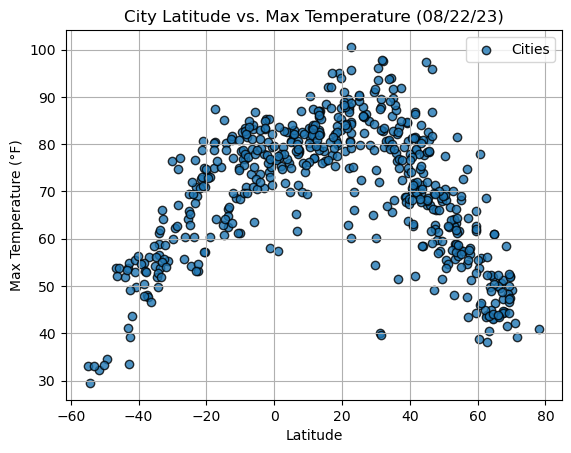

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

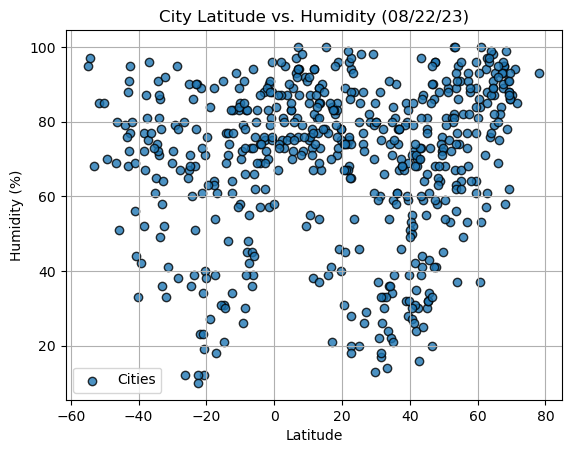

In [10]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

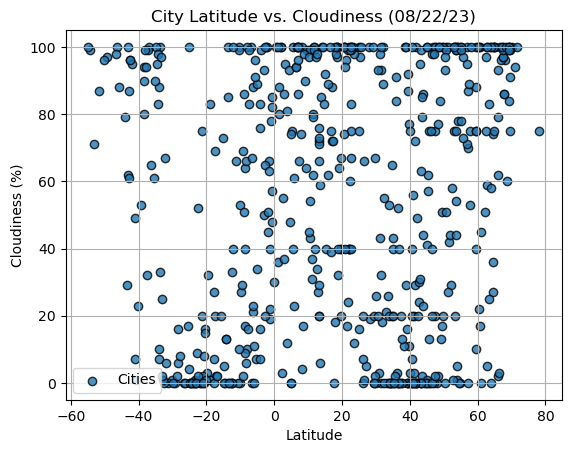

In [11]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

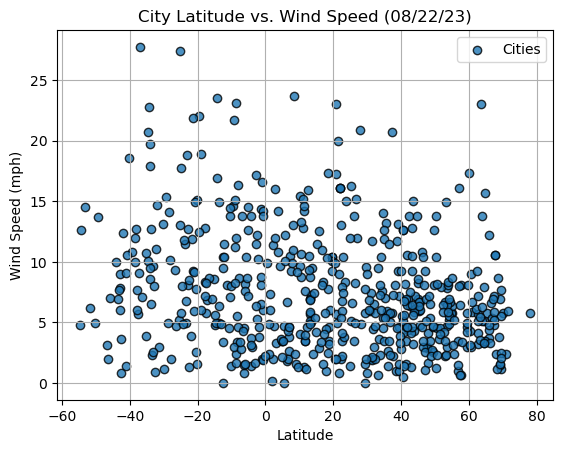

In [12]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Create regression equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate regression equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Set title and labels
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel("Weather Variable")
    
    # Print r-value
    print(f"The r-value is: {rvalue}")
    
    # Show plot
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,iqaluit,63.7506,-68.5145,49.69,76,100,23.00,CA,1692749473
5,san patricio,28.0170,-97.5169,84.85,82,100,20.92,US,1692749473
6,iskateley,67.6803,53.1512,44.42,95,86,10.58,RU,1692749473
7,nar'yan-mar,67.6713,53.0870,44.49,95,86,10.54,RU,1692749474
8,kandahar,31.0000,65.7500,71.92,22,3,5.93,AF,1692749474


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,51.82,79,79,10.00,NZ,1692749472
1,ondjiva,-17.0667,15.7333,64.11,18,2,6.85,AO,1692749472
3,port mathurin,-19.6833,63.4167,73.53,76,3,22.03,MU,1692749473
4,ilebo,-4.3167,20.5833,73.62,69,16,1.41,CD,1692749473
9,port-aux-francais,-49.3500,70.2167,34.52,70,97,13.67,TF,1692749474


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7160606100449812


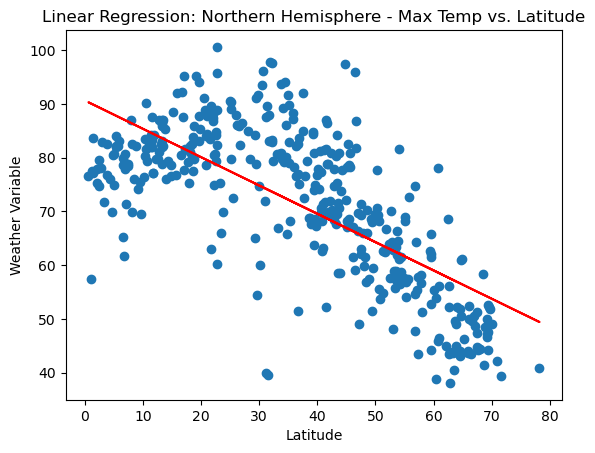

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Linear Regression: Northern Hemisphere - Max Temp vs. Latitude", (0, 0))


The r-value is: 0.8404270861826348


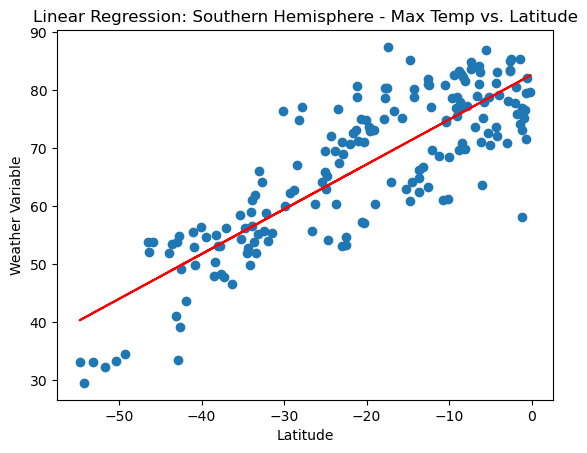

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Linear Regression: Southern Hemisphere - Max Temp vs. Latitude", (0, 0))


**Discussion about the linear relationship:** Cities cloest to the equater are warmer by tempature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04203118602264444


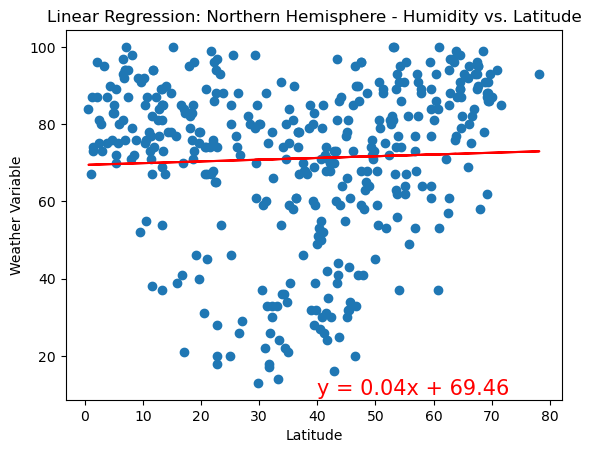

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Linear Regression: Northern Hemisphere - Humidity vs. Latitude", (40, 10))


The r-value is: -0.040408685501049486


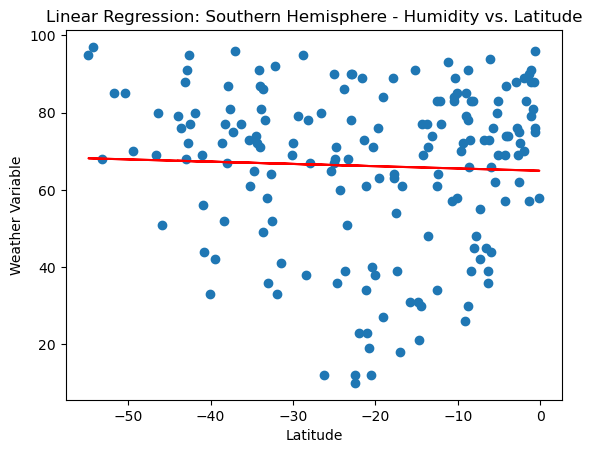

In [21]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Linear Regression: Southern Hemisphere - Humidity vs. Latitude", (40, 10))


**Discussion about the linear relationship:** Latitude has very little effect on the humidy levels these cities

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01486620777648163


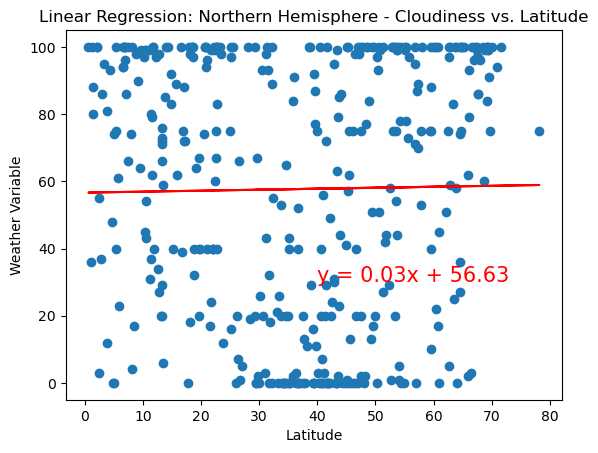

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Linear Regression: Northern Hemisphere - Cloudiness vs. Latitude", (40, 30))


The r-value is: -0.1567977152695927


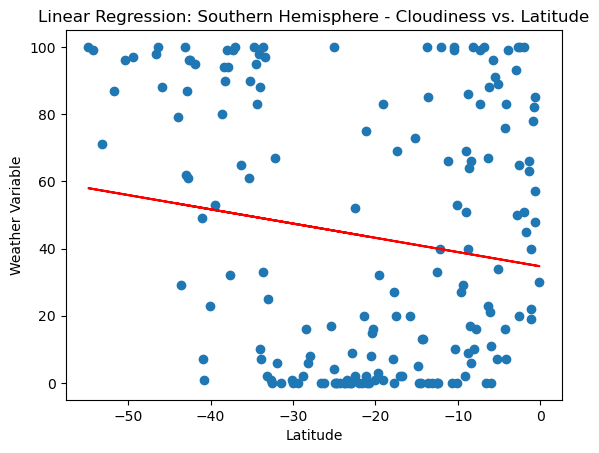

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Linear Regression: Southern Hemisphere - Cloudiness vs. Latitude", (40, 30))


**Discussion about the linear relationship:** 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.14750877419571956


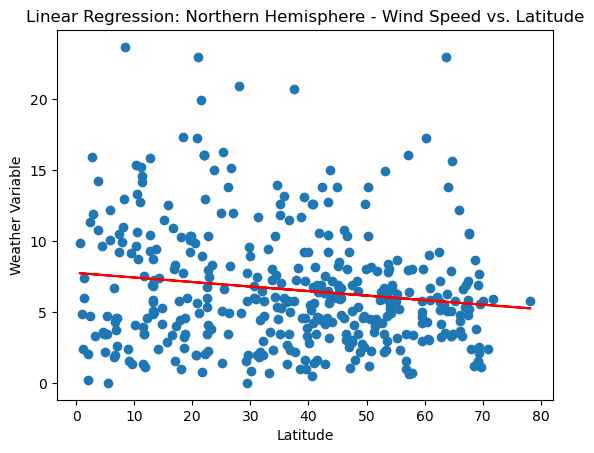

In [24]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Linear Regression: Northern Hemisphere - Wind Speed vs. Latitude", (40, 30))


The r-value is: -0.07491029338743992


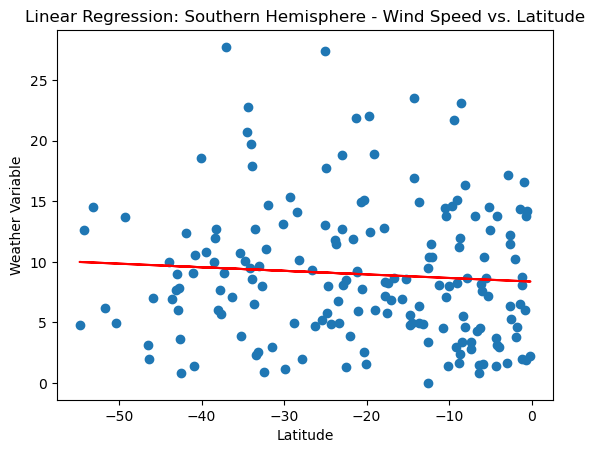

In [25]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Linear Regression: Southern Hemisphere - Wind Speed vs. Latitude", (40, 30))


**Discussion about the linear relationship:** YOUR RESPONSE HERE